In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#!pip install kaggle --upgrade

  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110700 sha256=bf604e7d6e45ee32351e9e8f93915c55b4b79b0fd1ad2c01d220fa8a1da4387c
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\d2\ed\a5\da3a0cfb13373d1ace41cafa4f2467d858c55c52473ba72799
Successfully built kaggle


In [3]:
#!kaggle competitions download -c animal-shelter-logs
!unzip animal-shelter-logs

Archive:  animal-shelter-logs.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
df = pd.read_csv('train.csv')
df = df.drop(['ID', 'Name'],axis=1)
df

,SexuponOutcome,AnimalType,AgeuponOutcome,Breed,Color,DateTime,Outcome
0,Neutered Male,Cat,2 months,Domestic Shorthair Mix,Black/White,2014-06-11 14:36:00,0
1,Intact Female,Cat,1 month,Domestic Shorthair Mix,Tortie/White,2014-07-18 08:10:00,3
2,Neutered Male,Dog,3 months,Chihuahua Shorthair Mix,Yellow,2016-01-02 17:28:00,2
3,Spayed Female,Cat,2 years,Domestic Shorthair Mix,Calico,2014-02-19 17:27:00,0
4,Neutered Male,Cat,2 months,Domestic Shorthair Mix,Orange Tabby,2014-07-21 17:34:00,0
...,...,...,...,...,...,...,...
18705,Neutered Male,Dog,7 months,Labrador Retriever Mix,Chocolate/White,2015-04-14 18:35:00,1
18706,Intact Male,Dog,3 months,Pit Bull/Chihuahua Shorthair,Tan,2013-10-28 12:33:00,2
18707,Spayed Female,Dog,2 years,Pit Bull Mix,White/Brown Brindle,2014-12-05 15:14:00,0
18708,Intact Male,Dog,2 years,Newfoundland Mix,Black,2014-06-29 17:08:00,1


In [3]:
df.dtypes

SexuponOutcome    object
AnimalType        object
AgeuponOutcome    object
Breed             object
Color             object
DateTime          object
Outcome            int64
dtype: object

In [135]:
df_cat = df.drop(['DateTime'], axis=1)
for feat in df_cat.columns:
    print(feat, pd.unique(df_cat[feat]))

SexuponOutcome ['Neutered Male' 'Intact Female' 'Spayed Female' 'Intact Male' 'Unknown'
 nan]
AnimalType ['Cat' 'Dog']
AgeuponOutcome ['2 months' '1 month' '3 months' '2 years' '4 months' '3 years' '5 years'
 '8 months' '7 years' '1 weeks' '4 years' '1 year' '4 weeks' '6 years'
 '13 years' '8 years' '9 months' '6 months' '10 months' '9 years'
 '3 weeks' '2 weeks' '10 years' '3 days' '5 months' '2 days' '11 years'
 '12 years' '15 years' '14 years' '1 week' '1 day' '11 months' '16 years'
 '7 months' '18 years' '6 days' nan '5 weeks' '5 days' '17 years' '4 days'
 '0 years' '19 years' '20 years']
Breed ['Domestic Shorthair Mix' 'Chihuahua Shorthair Mix' 'Rottweiler Mix' ...
 'British Shorthair' 'Pit Bull/Bulldog' 'Great Dane/Pit Bull']
Color ['Black/White' 'Tortie/White' 'Yellow' 'Calico' 'Orange Tabby' 'Black/Tan'
 'Buff' 'Brown/White' 'Brown Brindle/White' 'White/Black' 'Black/Brown'
 'Chocolate' 'Brown' 'Orange/White' 'Tan' 'Blue Tabby' 'Tricolor'
 'Orange Tabby/White' 'White/Red' 'Blac

# NaNы

In [136]:
df.isna().sum()

SexuponOutcome     1
AnimalType         0
AgeuponOutcome    14
Breed              0
Color              0
DateTime           0
Outcome            0
dtype: int64

In [137]:
df_cat['AgeuponOutcome'].fillna('-1 days', inplace=True)

In [138]:
df_cat['SexuponOutcome'].fillna('Unknown', inplace=True)

# Преобразовать данные

## Длительность пребывания

In [191]:
df_cat['date_num'] = df_cat['AgeuponOutcome'].apply(lambda x: int(x.split()[0]))

In [192]:
df_cat['date_type'] = df_cat['AgeuponOutcome'].apply(lambda x: x.split()[1])
df_cat['date_type'] = df_cat['date_type'].apply(lambda x: x.rstrip('s'))
df_cat['date_type'].unique()

array(['month', 'year', 'week', 'day'], dtype=object)

In [194]:
df_period = df_cat['date_num'] * df_cat['date_type'].map({'month' : 30, 'year': 365, 'week': 7, 'day': 1})

In [195]:
df_period.describe()

count    18710.000000
mean       793.970871
std       1087.944222
min         -1.000000
25%         60.000000
50%        365.000000
75%       1095.000000
max       7300.000000
dtype: float64

In [142]:
fillerna = df_period[df_period > 0].mean()

In [196]:
df_period[df_period <= 0] = fillerna

## Пол и статус стерильности

In [161]:
df_gen = pd.DataFrame()
df_gen['Gender'] = df_cat['SexuponOutcome'].apply(lambda x: x.split()[-1])
df_gen['Status'] = df_cat['SexuponOutcome'].apply(lambda x: x.split()[0])

In [162]:
df_gen['Status'].unique()

array(['Neutered', 'Intact', 'Spayed', 'Unknown'], dtype=object)

In [163]:
df_gen[df_cat.SexuponOutcome == 'Unknown']

,Gender,Status
88,Unknown,Unknown
113,Unknown,Unknown
144,Unknown,Unknown
184,Unknown,Unknown
222,Unknown,Unknown
...,...,...
18648,Unknown,Unknown
18655,Unknown,Unknown
18681,Unknown,Unknown
18688,Unknown,Unknown


In [164]:
df_gen.loc[df_gen['Status']=='Neutered','Status'] = 'Spayed'
df_gen['Status'].unique()

array(['Spayed', 'Intact', 'Unknown'], dtype=object)

# Порода

In [61]:
Cat_breed = df_cat[df_cat.AnimalType == 'Cat'].Breed.unique()
Cat_breed, len(Cat_breed)

(array(['Domestic Shorthair Mix', 'Persian Mix', 'Domestic Shorthair',
        'Domestic Longhair Mix', 'Domestic Medium Hair Mix', 'Maine Coon',
        'Siamese Mix', 'Manx', 'Devon Rex Mix', 'Snowshoe Mix', 'Manx Mix',
        'Domestic Longhair', 'Siamese/Domestic Shorthair',
        'Domestic Medium Hair/Siamese', 'Russian Blue Mix',
        'Domestic Medium Hair', 'Ragdoll Mix', 'Siamese', 'Balinese Mix',
        'Snowshoe/Ragdoll', 'Maine Coon Mix', 'Burmese', 'Himalayan Mix',
        'Persian', 'Pixiebob Shorthair Mix', 'Bombay Mix',
        'American Shorthair Mix', 'Havana Brown Mix', 'Abyssinian Mix',
        'Manx/Domestic Shorthair', 'Angora Mix',
        'Domestic Shorthair/Domestic Medium Hair', 'Snowshoe',
        'Domestic Longhair/Persian', 'Japanese Bobtail Mix',
        'Tonkinese Mix', 'Devon Rex', 'Russian Blue',
        'Manx/Domestic Longhair', 'Ocicat Mix', 'Domestic Longhair/Rex',
        'Domestic Longhair/Russian Blue', 'Himalayan',
        'Siamese/Japanese

In [62]:
res = []
for i in Cat_breed:
    #res.extend(i.split('/'))
    res.extend(map(lambda x: x.rstrip(' Mix'), i.split('/')))
Cat_breed_all = pd.Series(res).unique()
Cat_breed_all.sort()
print(Cat_breed_all, len(Cat_breed_all))

['Abyssinian' 'American Shorthair' 'Angora' 'Balinese' 'Bengal' 'Bombay'
 'British Shorthair' 'Burmese' 'Cornish Re' 'Devon Re' 'Domestic Longhair'
 'Domestic Medium Hair' 'Domestic Shorthair' 'Havana Brown' 'Himalayan'
 'Japanese Bobtail' 'Maine Coon' 'Man' 'Ocicat' 'Persian'
 'Pixiebob Shorthair' 'Ragdoll' 'Re' 'Russian Blue' 'Siamese' 'Snowshoe'
 'Sphyn' 'Tonkinese' 'Turkish Van'] 29


In [63]:
Dog_breed = df_cat[df_cat.AnimalType == 'Dog'].Breed.unique()
Dog_breed.shape[0]

1093

In [64]:
res = []
for i in Dog_breed:
    #res.extend(i.split('/'))
    res.extend(map(lambda x: x.rstrip(' Mix'), i.split('/')))
Dog_breed_all = pd.Series(res).unique()
Dog_breed_all.sort()
print(len(Dog_breed_all))

181


In [65]:
Dog_breed_all

array(['Affenpinscher', 'Airedale Terrier', 'Akita', 'Alaskan Husky',
       'Alaskan Malamute', 'American Bulldog', 'American Eskimo',
       'American Foxhound', 'American Pit Bull Terrier',
       'American Staffordshire Terrier', 'Anatol Shepherd',
       'Australian Cattle Dog', 'Australian Kelpie',
       'Australian Shepherd', 'Australian Terrier', 'Basenj',
       'Basset Hound', 'Beagle', 'Beauceron', 'Bedlington Terr',
       'Belgian Malinois', 'Belgian Sheepdog', 'Belgian Tervuren',
       'Bernese Mountain Dog', 'Bichon Frise', 'Black', 'Black Mouth Cur',
       'Bloodhound', 'Blue Lacy', 'Bluetick Hound', 'Boerboel',
       'Border Collie', 'Border Terrier', 'Boston Terrier', 'Boxer',
       'Boykin Span', 'Brittany', 'Bruss Griffon', 'Bull Terrier',
       'Bull Terrier Miniature', 'Bulldog', 'Bullmastiff',
       'Cairn Terrier', 'Canaan Dog', 'Cane Corso', 'Cardigan Welsh Corg',
       'Carolina Dog', 'Catahoula', 'Cavalier Span', 'Chesa Bay Retr',
       'Chihuahua Lo

# Бинаризация признаков

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
df_cat.drop(['AgeuponOutcome', 'SexuponOutcome', 'date_num', 'date_type'], axis=1, inplace=True)

In [127]:
df_cat

,AnimalType,Breed,Color,Outcome
0,Cat,Domestic Shorthair Mix,Black/White,0
1,Cat,Domestic Shorthair Mix,Tortie/White,3
2,Dog,Chihuahua Shorthair Mix,Yellow,2
3,Cat,Domestic Shorthair Mix,Calico,0
4,Cat,Domestic Shorthair Mix,Orange Tabby,0
...,...,...,...,...
18705,Dog,Labrador Retriever Mix,Chocolate/White,1
18706,Dog,Pit Bull/Chihuahua Shorthair,Tan,2
18707,Dog,Pit Bull Mix,White/Brown Brindle,0
18708,Dog,Newfoundland Mix,Black,1


In [67]:
model_b = CountVectorizer()
model_b.fit(df_cat['Breed'])
model_b.get_feature_names_out(), len(model.get_feature_names_out())

(array(['abyssinian', 'affenpinscher', 'airedale', 'akita', 'alaskan',
        'american', 'anatol', 'angora', 'apso', 'argentino', 'australian',
        'balinese', 'basenji', 'basset', 'bay', 'beagle', 'beauceron',
        'bedlington', 'belgian', 'bengal', 'bernard', 'bernese', 'bichon',
        'black', 'bloodhound', 'blue', 'bluetick', 'bobtail', 'boerboel',
        'bombay', 'bordeaux', 'border', 'boston', 'boxer', 'boykin',
        'brindle', 'british', 'brittany', 'brown', 'bruss', 'bull',
        'bulldog', 'bullmastiff', 'burmese', 'cairn', 'canaan', 'canario',
        'cane', 'cardigan', 'carolina', 'catahoula', 'cattle', 'cavalier',
        'chesa', 'chihuahua', 'chin', 'chinese', 'chow', 'coat', 'coated',
        'cocker', 'collie', 'coon', 'coonhound', 'corgi', 'cornish',
        'corso', 'crested', 'cur', 'dachshund', 'dalmatian', 'dane', 'de',
        'devon', 'doberman', 'dog', 'dogo', 'dogue', 'domestic', 'duck',
        'dutch', 'english', 'eskimo', 'feist', 'field',

In [68]:
model_c = CountVectorizer()
model_c.fit(df_cat['Color'])
model_c.get_feature_names_out(), len(model_c.get_feature_names_out())

(array(['agouti', 'apricot', 'black', 'blue', 'brindle', 'brown', 'buff',
        'calico', 'chocolate', 'cream', 'fawn', 'flame', 'gold', 'gray',
        'lilac', 'liver', 'lynx', 'merle', 'orange', 'pink', 'point',
        'red', 'ruddy', 'sable', 'seal', 'silver', 'smoke', 'tabby', 'tan',
        'tick', 'tiger', 'torbie', 'tortie', 'tricolor', 'white', 'yellow'],
       dtype=object),
 36)

In [70]:
model_at = LabelBinarizer()
model_at.fit(df_cat['AnimalType'])
model_at.classes_

array(['Cat', 'Dog'], dtype='<U3')

In [165]:
model_gen = OneHotEncoder(drop=['Unknown', 'Unknown'])
model_gen.fit(df_gen)
model_gen.feature_names_in_

array(['Gender', 'Status'], dtype=object)

In [166]:
model_gen.get_feature_names_out()

array(['Gender_Female', 'Gender_Male', 'Status_Intact', 'Status_Spayed'],
      dtype=object)

In [77]:
df_at = pd.DataFrame(data=model_at.transform(df_cat['AnimalType']), columns=['cat/dog'])
df_at

,cat/dog
0,0
1,0
2,1
3,0
4,0
...,...
18705,1
18706,1
18707,1
18708,1


In [92]:
df_b = pd.DataFrame(data=model_b.transform(df_cat['Breed']).toarray(), columns=list(model_b.get_feature_names_out()))
df_b.drop(['de', 'st'],axis=1, inplace=True)
df_b

,abyssinian,affenpinscher,airedale,akita,alaskan,american,anatol,angora,apso,argentino,...,weimaraner,welsh,west,wheaten,whippet,wire,wirehair,wirehaired,wolfhound,yorkshire
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df_c = pd.DataFrame(data=model_c.transform(df_cat['Color']).toarray(), columns=list(model_c.get_feature_names_out()))
df_c

,agouti,apricot,black,blue,brindle,brown,buff,calico,chocolate,cream,...,smoke,tabby,tan,tick,tiger,torbie,tortie,tricolor,white,yellow
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18705,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
18706,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
18707,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18708,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
df_gen_bin = pd.DataFrame(model_gen.transform(df_gen).toarray(), columns=model_gen.get_feature_names_out())
df_gen_bin

,Gender_Female,Gender_Male,Status_Intact,Status_Spayed
0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0
...,...,...,...,...
18705,0.0,1.0,0.0,1.0
18706,0.0,1.0,1.0,0.0
18707,1.0,0.0,0.0,1.0
18708,0.0,1.0,1.0,0.0


# Дата

In [180]:
df_d = pd.to_numeric(pd.to_datetime(df['DateTime']))
df_d

0        1402497360000000000
1        1405671000000000000
2        1451755680000000000
3        1392830820000000000
4        1405964040000000000
                ...         
18705    1429036500000000000
18706    1382963580000000000
18707    1417792440000000000
18708    1404061680000000000
18709    1387903320000000000
Name: DateTime, Length: 18710, dtype: int64

In [173]:
df.columns

Index(['SexuponOutcome', 'AnimalType', 'AgeuponOutcome', 'Breed', 'Color',
       'DateTime', 'Outcome'],
      dtype='object')

In [197]:
df_period.name = 'period'
df_period

0         60.0
1         30.0
2         90.0
3        730.0
4         60.0
         ...  
18705    210.0
18706     90.0
18707    730.0
18708    730.0
18709     60.0
Name: period, Length: 18710, dtype: float64

In [220]:
df_res = df_gen_bin.merge(df_at, left_index=True, right_index=True)\
    .merge(df_period, left_index=True, right_index=True)\
    .merge(df_b, left_index=True, right_index=True)\
    .merge(df_c, left_index=True, right_index=True)\
    .merge(df_d, left_index=True, right_index=True)
y = df.Outcome
df_res

,Gender_Female,Gender_Male,Status_Intact,Status_Spayed,cat/dog,period,abyssinian,affenpinscher,airedale,akita,...,tabby,tan_y,tick,tiger,torbie,tortie,tricolor,white,yellow,DateTime
0,0.0,1.0,0.0,1.0,0,60.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1402497360000000000
1,1.0,0.0,1.0,0.0,0,30.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1405671000000000000
2,0.0,1.0,0.0,1.0,1,90.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1451755680000000000
3,1.0,0.0,0.0,1.0,0,730.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1392830820000000000
4,0.0,1.0,0.0,1.0,0,60.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1405964040000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18705,0.0,1.0,0.0,1.0,1,210.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1429036500000000000
18706,0.0,1.0,1.0,0.0,1,90.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1382963580000000000
18707,1.0,0.0,0.0,1.0,1,730.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1417792440000000000
18708,0.0,1.0,1.0,0.0,1,730.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1404061680000000000


# Перешкалирование

In [222]:
from sklearn.preprocessing import StandardScaler

<AxesSubplot:>

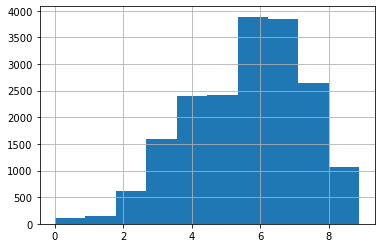

In [223]:
np.log(df_res.period).hist()

In [224]:
df_res.period = np.log(df_res.period)

<AxesSubplot:>

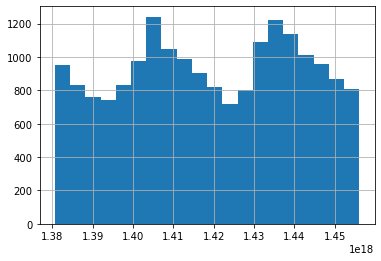

In [225]:
df_res.DateTime.hist(bins=20)

In [226]:
scaler=StandardScaler()
df_res[['period', 'DateTime']] = scaler.fit_transform(df_res[['period', 'DateTime']])

array([[<AxesSubplot:title={'center':'period'}>,
        <AxesSubplot:title={'center':'DateTime'}>]], dtype=object)

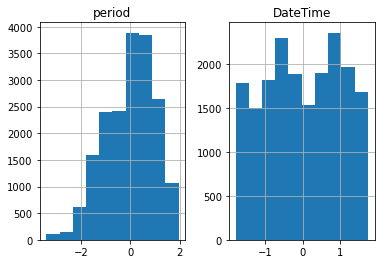

In [227]:
df_res[['period', 'DateTime']].hist()

# Модель

In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

#X_train, X_val, y_train, y_val = train_test_split(df_res, y, test_size=0.33, random_state = 1234)

In [242]:
model1 = LogisticRegression(penalty='l2')
model1.fit(X_train, y_train)
f1_score(model1.predict(X_val), y_val, average='macro')

D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3997874497859076